# Parameters tuning

In [1]:
%load_ext autoreload
%autoreload

import sys
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from dl85 import DL85Classifier
from sklearn.model_selection import train_test_split

sys.path.append('../../utils')
from toBoolean import convert

In [2]:
gt = pd.read_csv('../../../dumps/various_sizes/8K.csv')
data = convert(gt)
target = gt['label']

data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 0)

## Depth

Maximum depth of the tree to be found

In [3]:
x_labels = []
y_training_set = []
y_test_set = []
y_time = []

for i in range(1,5):
    start = time.perf_counter()
    tree = DL85Classifier(max_depth=i)
    tree.fit(data_train, target_train)
    duration = time.perf_counter() - start
    print("\n=== Depth {} ===".format(i))
    print("Duration: {:.2f}s".format(duration))
    print("Accuracy on training set: {:.3f}".format(tree.score(data_train, target_train))) 
    print("Accuracy on test set: {:.3f}".format(tree.score(data_test, target_test)))
    x_labels.append(i)
    y_training_set.append(tree.score(data_train, target_train))
    y_test_set.append(tree.score(data_test, target_test))
    y_time.append(duration)
    
plt.plot(x_labels, y_training_set, label="Training set")
plt.plot(x_labels, y_test_set, label="Test set")
plt.plot(x_labels, y_time, label="Time")
plt.legend()
plt.show()

DL8.5 fitting: Solution found

=== Depth 1 ===
Duration: 0.01s
Accuracy on training set: 0.918
Accuracy on test set: 0.923
DL8.5 fitting: Solution found

=== Depth 2 ===
Duration: 0.05s
Accuracy on training set: 0.943
Accuracy on test set: 0.938
DL8.5 fitting: Solution found

=== Depth 3 ===
Duration: 3.31s
Accuracy on training set: 0.974
Accuracy on test set: 0.970


KeyboardInterrupt: 

## Iterative

DL8.5 fitting: Solution found

=== Depth 1 ===
Duration: 0.03s
Accuracy on training set: 0.918
Accuracy on test set: 0.923
DL8.5 fitting: Solution found

=== Depth 2 ===
Duration: 0.09s
Accuracy on training set: 0.943
Accuracy on test set: 0.938
DL8.5 fitting: Solution found

=== Depth 3 ===
Duration: 4.20s
Accuracy on training set: 0.974
Accuracy on test set: 0.970
DL8.5 fitting: Solution found

=== Depth 4 ===
Duration: 197.83s
Accuracy on training set: 0.986
Accuracy on test set: 0.985


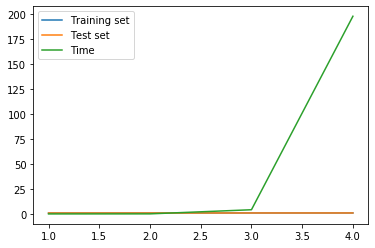

In [3]:
x_labels = []
y_training_set = []
y_test_set = []
y_time = []

for i in range(1,5):
    start = time.perf_counter()
    tree = DL85Classifier(max_depth=i, iterative=True)
    tree.fit(data_train, target_train)
    duration = time.perf_counter() - start
    print("\n=== Depth {} ===".format(i))
    print("Duration: {:.2f}s".format(duration))
    print("Accuracy on training set: {:.3f}".format(tree.score(data_train, target_train))) 
    print("Accuracy on test set: {:.3f}".format(tree.score(data_test, target_test)))
    x_labels.append(i)
    y_training_set.append(tree.score(data_train, target_train))
    y_test_set.append(tree.score(data_test, target_test))
    y_time.append(duration)
    
plt.plot(x_labels, y_training_set, label="Training set")
plt.plot(x_labels, y_test_set, label="Test set")
plt.plot(x_labels, y_time, label="Time")
plt.legend()
plt.show()

## Min sup

In [4]:
start = time.perf_counter()
tree = DL85Classifier(max_depth=2, min_sup=2)
tree.fit(data_train, target_train)
duration = time.perf_counter() - start
print("Duration: {:.2f}s".format(duration))
print("Accuracy on training set: {:.3f}".format(tree.score(data_train, target_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(data_test, target_test)))

DL8.5 fitting: Solution found
Duration: 0.09s
Accuracy on training set: 0.943
Accuracy on test set: 0.938


## Time limit
We can use a limit of time instead of a depth limit

In [5]:
start = time.perf_counter()
tree = DL85Classifier(max_depth=4, time_limit=300)
tree.fit(data_train, target_train)
duration = time.perf_counter() - start
print("Duration: {:.2f}s".format(duration))
print("Accuracy on training set: {:.3f}".format(tree.score(data_train, target_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(data_test, target_test)))

DL8.5 fitting: Solution found
Duration: 270.31s
Accuracy on training set: 0.986
Accuracy on test set: 0.984


In [6]:
start = time.perf_counter()
tree = DL85Classifier(max_depth=4, time_limit=300, iterative=True)
tree.fit(data_train, target_train)
duration = time.perf_counter() - start
print("Duration: {:.2f}s".format(duration))
print("Accuracy on training set: {:.3f}".format(tree.score(data_train, target_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(data_test, target_test)))

DL8.5 fitting: Solution found
Duration: 217.61s
Accuracy on training set: 0.986
Accuracy on test set: 0.985
